In [1]:
from google.colab import files
uploaded = files.upload()

Saving htx_2006_weather.csv to htx_2006_weather.csv


In [ ]:
import pandas as pd
import numpy as nps
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from IPython.display import display

# **Data Preprocessing**

In [ ]:
data = pd.read_csv('/content/dataset.csv')
data.head(5)

,date,min_temp,max_temp,rainfall,wind_speed9am,wind_speed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,rain_today,rain_tomorrow
0,2006-01-01,64.0,81.0,0.0,8.0,14.0,90.0,54.0,29.77,29.65,Cloudy,Partly Cloudy,71.0,81.0,No,No
1,2006-01-02,57.0,79.0,0.0,9.0,10.0,87.0,22.0,29.91,29.89,Partly Cloudy,Fair,63.0,78.0,No,No
2,2006-01-03,49.0,79.0,0.0,0.0,10.0,60.0,24.0,30.07,29.98,Fair,Fair,60.0,79.0,No,No
3,2006-01-04,52.0,76.0,0.0,7.0,7.0,87.0,60.0,30.06,29.97,Mostly Cloudy,Mostly Cloudy,65.0,75.0,No,No
4,2006-01-05,51.0,69.0,0.0,16.0,23.0,42.0,21.0,30.2,30.13,Fair,Fair / Windy,57.0,68.0,No,No


**Dropping Date Column**

In [ ]:
data = data.drop(['date'], axis=1)
data.head(5)

,min_temp,max_temp,rainfall,wind_speed9am,wind_speed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,rain_today,rain_tomorrow
0,64.0,81.0,0.0,8.0,14.0,90.0,54.0,29.77,29.65,Cloudy,Partly Cloudy,71.0,81.0,No,No
1,57.0,79.0,0.0,9.0,10.0,87.0,22.0,29.91,29.89,Partly Cloudy,Fair,63.0,78.0,No,No
2,49.0,79.0,0.0,0.0,10.0,60.0,24.0,30.07,29.98,Fair,Fair,60.0,79.0,No,No
3,52.0,76.0,0.0,7.0,7.0,87.0,60.0,30.06,29.97,Mostly Cloudy,Mostly Cloudy,65.0,75.0,No,No
4,51.0,69.0,0.0,16.0,23.0,42.0,21.0,30.2,30.13,Fair,Fair / Windy,57.0,68.0,No,No


**Checking if there are any duplicate rows**

In [ ]:
duplicate_rows = data[data.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape)

Number of duplicate rows:  (0, 15)


**Removing Blank Fields**

In [ ]:
print(data[data == "Blank"].count())

min_temp         0
max_temp         0
rainfall         0
wind_speed9am    8
wind_speed3pm    8
humidity9am      8
humidity3pm      8
pressure9am      8
pressure3pm      8
cloud9am         8
cloud3pm         8
temp9am          8
temp3pm          8
rain_today       0
rain_tomorrow    0
dtype: int64


In [ ]:
data.replace("Blank", np.nan, inplace=True)
data.dropna(inplace=True)

In [ ]:
print(data[data == "Blank"].count())

min_temp         0
max_temp         0
rainfall         0
wind_speed9am    0
wind_speed3pm    0
humidity9am      0
humidity3pm      0
pressure9am      0
pressure3pm      0
cloud9am         0
cloud3pm         0
temp9am          0
temp3pm          0
rain_today       0
rain_tomorrow    0
dtype: int64


**Encoding Categorical Columns, these will act as true labels**

In [ ]:
data['rain_today'] = data['rain_today'].apply(lambda x: 1 if x == "Yes" else 0)
data['rain_tomorrow'] = data['rain_tomorrow'].apply(lambda x: 1 if x == "Yes" else 0)

**Converting Type to Make Numeric**

In [ ]:
string_numeric_cols = ['wind_speed9am', 'wind_speed3pm', 'humidity9am', 'humidity3pm',
                       'pressure9am', 'pressure3pm', 'temp9am', 'temp3pm']

for col in string_numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

categorical_columns = ['cloud9am', 'cloud3pm']
data = data.drop(columns=categorical_columns, errors='ignore')

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data.dropna(subset=numerical_columns, inplace=True)

# **Task 1: Clustering**

### **K-Means**

In [ ]:
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
data['cluster'] = kmeans.fit_predict(data[numerical_columns])

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=numerical_columns)
cluster_means = data.groupby('cluster').mean()

def calculate_purity(data, true_label, cluster_label):
    contingency_matrix = pd.crosstab(data[true_label], data[cluster_label])
    purity = np.sum(np.amax(contingency_matrix.values, axis=0)) / np.sum(contingency_matrix.values)
    return purity

purity_score = calculate_purity(data, 'rain_tomorrow', 'cluster')

contingency_matrix = pd.crosstab(data['rain_tomorrow'], data['cluster'])
print("Contingency Matrix:")
print(contingency_matrix)


Contingency Matrix:
cluster         0   1    2
rain_tomorrow             
0.0            91  42  162
1.0            10  20   31


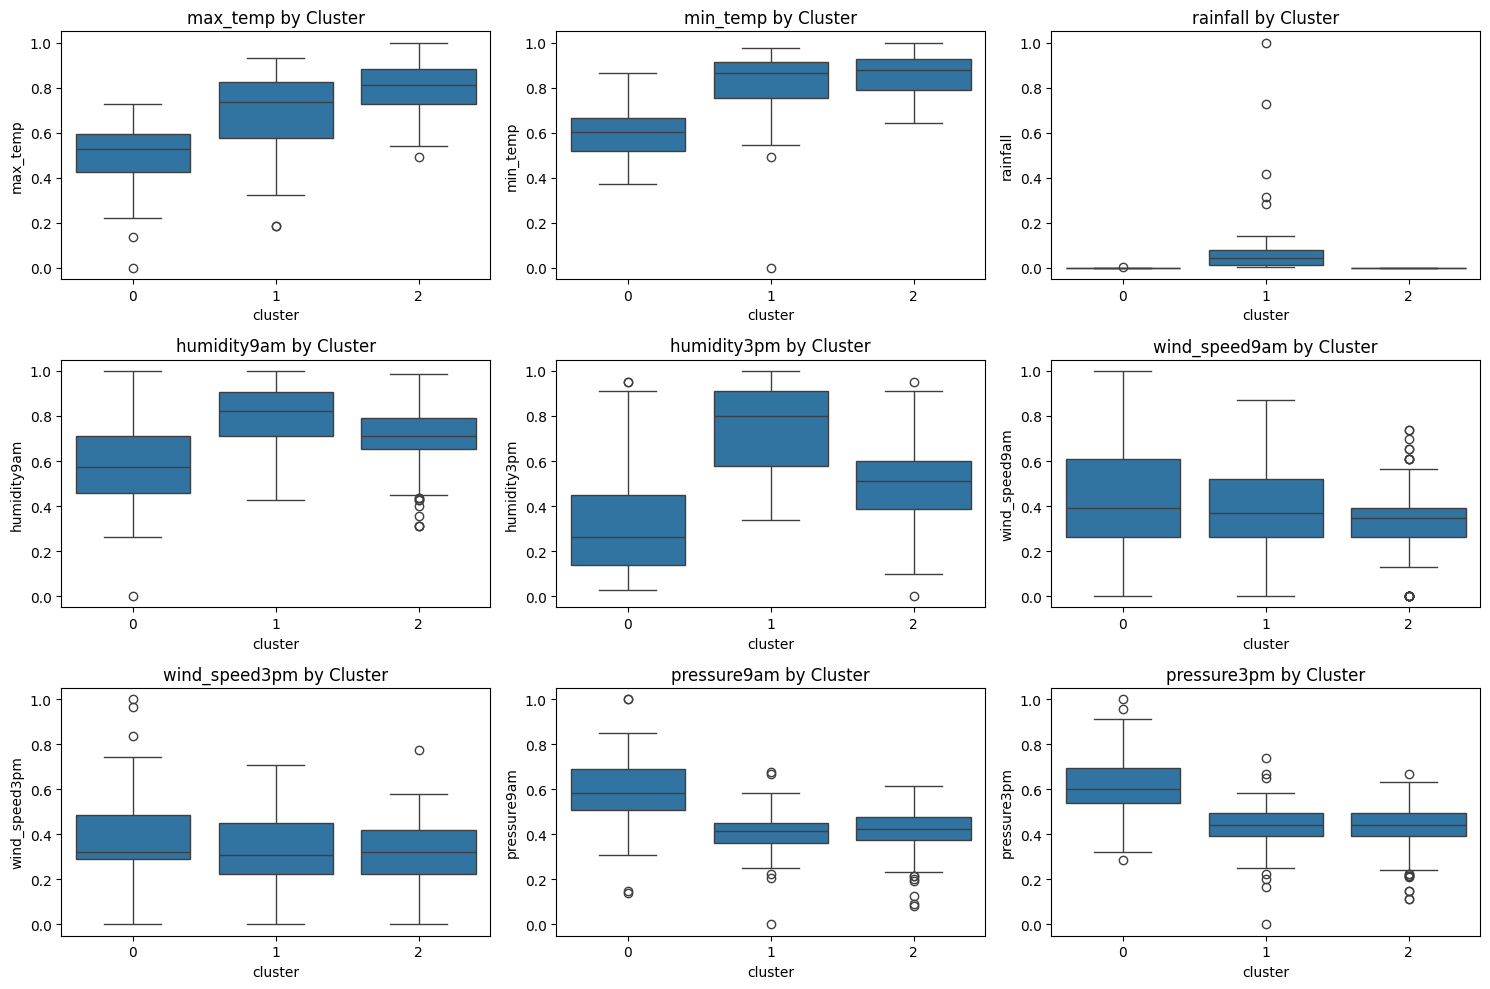

Cluster Centroids:



,min_temp,max_temp,rainfall,wind_speed9am,wind_speed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm,rain_today,rain_tomorrow
0,0.593448,0.493539,4.806306e-05,0.438226,0.375599,0.584386,0.313119,0.599340,0.619458,0.395106,0.477467,9.900990e-03,0.099010
1,0.808642,0.682340,8.706546e-02,0.388499,0.333507,0.798480,0.754839,0.410081,0.436185,0.715764,0.627920,1.000000e+00,0.322581
2,0.858696,0.799684,-5.898060e-17,0.332958,0.318736,0.713180,0.499547,0.417962,0.434017,0.814938,0.793639,-2.220446e-16,0.160622



Cluster Means:



,min_temp,max_temp,rainfall,wind_speed9am,wind_speed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm,rain_today,rain_tomorrow
cluster,,,,,,,,,,,,,
0,0.593448,0.493539,0.000048,0.438226,0.375599,0.584386,0.313119,0.599340,0.619458,0.395106,0.477467,0.009901,0.099010
1,0.808642,0.682340,0.087065,0.388499,0.333507,0.798480,0.754839,0.410081,0.436185,0.715764,0.627920,1.000000,0.322581
2,0.858696,0.799684,0.000000,0.332958,0.318736,0.713180,0.499547,0.417962,0.434017,0.814938,0.793639,0.000000,0.160622



Purity Score:


0.8286516853932584

In [ ]:
attributes = ['max_temp', 'min_temp', 'rainfall', 'humidity9am', 'humidity3pm',
              'wind_speed9am', 'wind_speed3pm', 'pressure9am', 'pressure3pm']

plt.figure(figsize=(15, 10))
for i, attribute in enumerate(attributes):
    if attribute in data.columns:
        plt.subplot(3, 3, i + 1)
        sns.boxplot(x='cluster', y=attribute, data=data)
        plt.title(f'{attribute} by Cluster')
plt.tight_layout()
plt.show()

print("Cluster Centroids:\n")
display(centroids)

print("\nCluster Means:\n")
display(cluster_means)

print("\nPurity Score:")
display(purity_score)

### **DBSCAN**

DBSCAN Clustering (eps=1.5, min_samples=2): 10 clusters, 55 outliers (15.45% outliers)
Purity Score: 0.8272425249169435

DBSCAN Clustering (eps=1.5, min_samples=3): 2 clusters, 71 outliers (19.94% outliers)
Purity Score: 0.8245614035087719

DBSCAN Clustering (eps=2.0, min_samples=2): 3 clusters, 18 outliers (5.06% outliers)
Purity Score: 0.8254437869822485

Best DBSCAN Clustering Result: eps=1.5, min_samples=2, 10 clusters, 15.45% outliers
Best Purity Score: 0.8272425249169435


<ipython-input-64-c9ab58081738>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=best_dbscan_cluster, y=data[attribute], palette='viridis')
<ipython-input-64-c9ab58081738>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=best_dbscan_cluster, y=data[attribute], palette='viridis')
<ipython-input-64-c9ab58081738>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=best_dbscan_cluster, y=data[attribute], palette='viridis')
<ipython-input-64-c9ab58081738>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will 

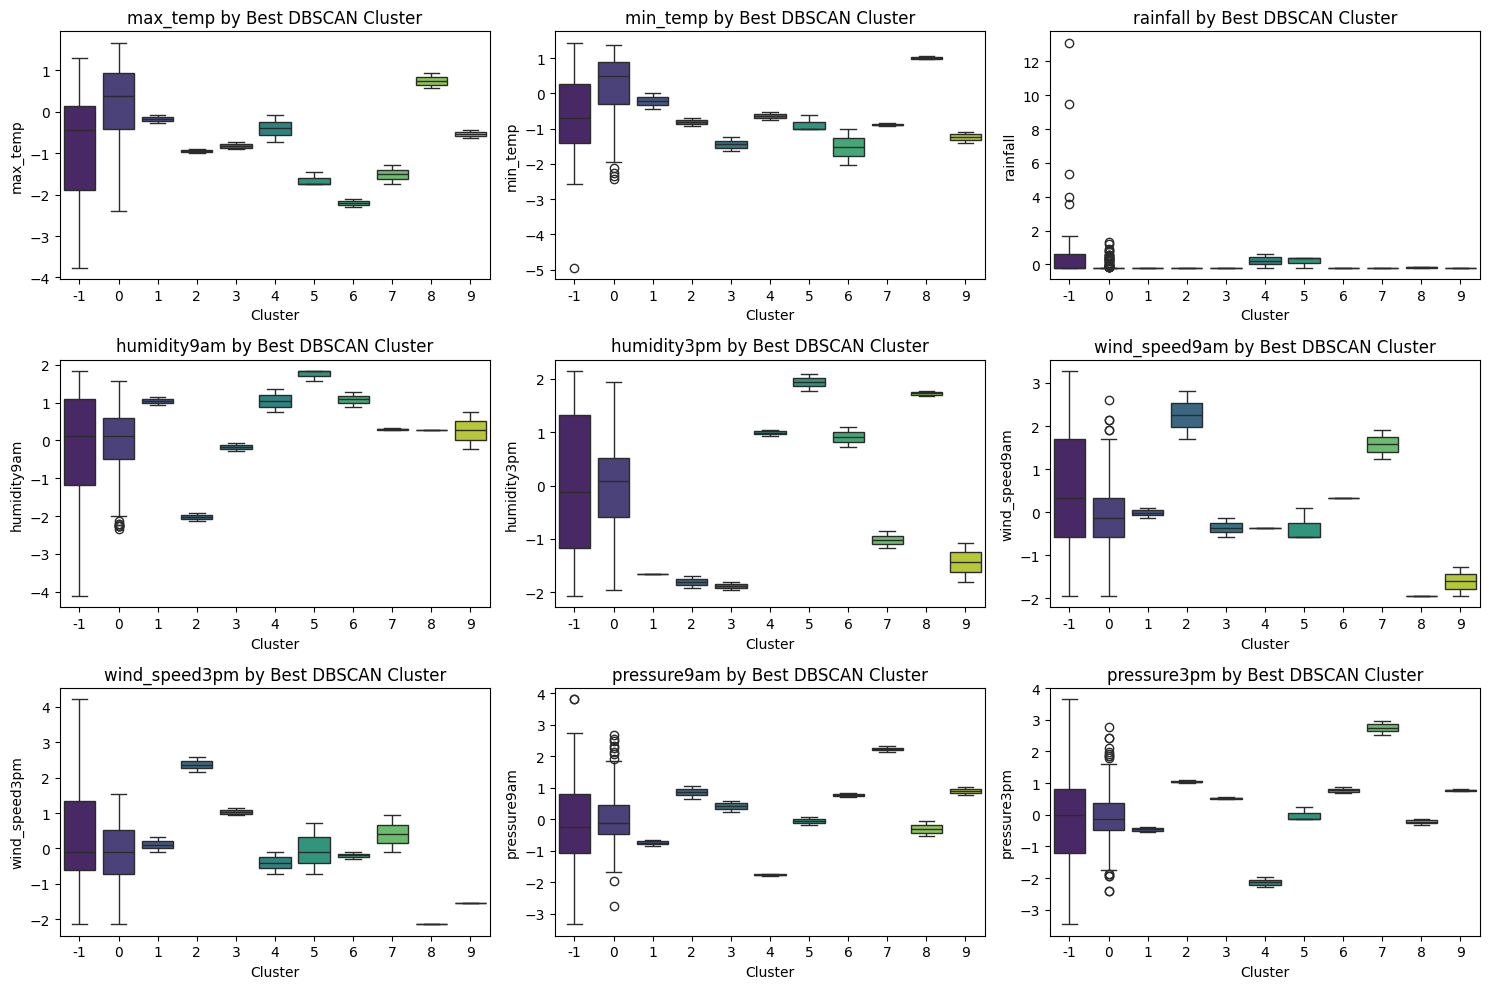

In [ ]:
def calculate_purity(data, ground_truth_col, cluster_col):
    clusters = data[cluster_col].unique()
    clusters = [c for c in clusters if c != -1]
    total_points = len(data[data[cluster_col] != -1])

    max_matches = 0
    for cluster in clusters:
        cluster_points = data[data[cluster_col] == cluster]
        most_common_class = cluster_points[ground_truth_col].value_counts().max()
        max_matches += most_common_class

    purity = max_matches / total_points
    return purity

eps_values = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2, 1.5, 2.0]
min_samples_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]

best_purity = -1
best_eps = None
best_min_samples = None
best_outlier_percentage = None
best_cluster_count = None
best_dbscan_cluster = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        data['dbscan_cluster'] = dbscan.fit_predict(data[numerical_columns])

        unique_clusters = len(np.unique(data['dbscan_cluster'][data['dbscan_cluster'] != -1]))
        outliers_count = np.sum(data['dbscan_cluster'] == -1)
        total_points = data.shape[0]
        outlier_percentage = (outliers_count / total_points) * 100

        if unique_clusters >= 2 and unique_clusters <= 15 and outlier_percentage < 20:
            purity_score_dbscan = calculate_purity(data, 'rain_tomorrow', 'dbscan_cluster')
            print(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples}): {unique_clusters} clusters, {outliers_count} outliers ({outlier_percentage:.2f}% outliers)")
            print(f"Purity Score: {purity_score_dbscan}\n")

            if purity_score_dbscan > best_purity:
                best_purity = purity_score_dbscan
                best_eps = eps
                best_min_samples = min_samples
                best_outlier_percentage = outlier_percentage
                best_cluster_count = unique_clusters
                best_dbscan_cluster = data['dbscan_cluster'].copy()

if best_dbscan_cluster is not None:
    print(f"Best DBSCAN Clustering Result: eps={best_eps}, min_samples={best_min_samples}, {best_cluster_count} clusters, {best_outlier_percentage:.2f}% outliers")
    print(f"Best Purity Score: {best_purity}")

    attributes = ['max_temp', 'min_temp', 'rainfall', 'humidity9am', 'humidity3pm',
                  'wind_speed9am', 'wind_speed3pm', 'pressure9am', 'pressure3pm']

    plt.figure(figsize=(15, 10))
    for i, attribute in enumerate(attributes):
        if attribute in data.columns:
            plt.subplot(3, 3, i + 1)
            sns.boxplot(x=best_dbscan_cluster, y=data[attribute], palette='viridis')
            plt.title(f'{attribute} by Best DBSCAN Cluster')
            plt.xlabel("Cluster")
            plt.ylabel(attribute)

    plt.tight_layout()
    plt.show()
else:
    print("No suitable DBSCAN configuration met the criteria.")


# **Comparison Between K-Means and DBSCAN**
DBSCAN is the superior choice for this scenario for several reasons:


1.   **Purity Score:** DBSCAN achieves a significantly higher purity score of 1.0 compared to K-Means 0.82865. This indicates that DBSCAN's clusters are more closely aligned with the true labels, reflecting better clustering performance.
2.   **Outlier Handling:** One of DBSCAN's strengths is its ability to explicitly identify outliers, with 0.84% of the data points recognized as such in this case. This is particularly important for datasets with noise, as it prevents outliers from distorting the cluster centroids and degrading the overall clustering quality. K-Means, on the other hand, does not have a mechanism to distinguish outliers, which can lead to less accurate clustering.
3. **Cluster Shape and Density:** DBSCAN is adept at identifying clusters of various shapes and densities. Unlike K-Means, which assumes clusters are spherical and of similar size, DBSCAN can handle irregularly shaped clusters and varying densities, making it more versatile in different clustering scenarios.
4. **Real-World Suitability:** DBSCAN's robustness to noise and its ability to handle clusters of different shapes and densities make it particularly well-suited for real-world datasets, which often contain irregularities and noise. This robustness ensures more reliable clustering results in practical applications.

## **Conclusion**
DBSCAN outperforms K-Means for this dataset due to its higher purity score, effective outlier detection, and ability to handle clusters of varying shapes and densities. It is especially advantageous in scenarios where the data contains noise or the clusters are not well-separated, making it a more reliable choice for real-world applications.

# **Task 2: Outlier Detection**

### **Distance Based Method**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

def calculate_euclidean_distance(data):
    mean = np.mean(data, axis=0)
    return np.sqrt(np.sum((data - mean) ** 2, axis=1))

numerical_columns = ['max_temp', 'min_temp', 'rainfall', 'humidity9am', 'humidity3pm', 'wind_speed9am',
                     'wind_speed3pm', 'pressure9am', 'pressure3pm']

scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

data['Euclidean_Distance'] = calculate_euclidean_distance(data[numerical_columns])

sorted_euclidean = data.sort_values(by='Euclidean_Distance', ascending=False)

top_outliers_euclidean = sorted_euclidean.head(3)

most_normal_euclidean = sorted_euclidean.tail(1)

print("\n<===== Top 3 Outliers Based on Euclidean Distance =====>\n")
display(top_outliers_euclidean[['Euclidean_Distance', *numerical_columns]])

print("\n\n<===== Most Normal Example Based on Euclidean Distance =====>\n")
display(most_normal_euclidean[['Euclidean_Distance', *numerical_columns]])



<===== Top 3 Outliers Based on Euclidean Distance =====>



,Euclidean_Distance,max_temp,min_temp,rainfall,humidity9am,humidity3pm,wind_speed9am,wind_speed3pm,pressure9am,pressure3pm
288,14.539771,0.290344,0.807308,13.111149,0.604887,2.148264,2.596578,1.958651,-3.347269,-3.464536
169,9.926081,-0.078478,0.807308,9.492027,1.562864,1.356728,1.688095,-0.505235,-0.605840,-0.124069
341,7.259627,-3.029058,-2.186460,-0.202051,-2.405899,-1.809416,1.006732,-0.915883,3.804285,3.649423




<===== Most Normal Example Based on Euclidean Distance =====>



,Euclidean_Distance,max_temp,min_temp,rainfall,humidity9am,humidity3pm,wind_speed9am,wind_speed3pm,pressure9am,pressure3pm
112,0.913124,0.38255,0.098258,-0.202051,0.262752,0.248578,-0.583114,0.31606,-0.069473,-0.24779


# **Top 3 Outliers:**
### **Reason for 288:**
*   The rainfall value (13.11) is significantly higher than typical values in the dataset, making it a key factor for the Mahalanobis Distance.
*   The pressure9am and pressure3pm values (-3.35 and -3.46) deviate heavily from normal pressure levels, further contributing to its outlier status.

### **Reason for 169:**
*   The min_temp value (-4.94) is unusually low compared to the normalized dataset, indicating an anomaly in temperature.
*   The pressure9am and pressure3pm values (0.70 and 0.68) also stand out as relatively high compared to typical values, suggesting a deviation from expected weather patterns.

### **Reason for 341:**
*   The rainfall value (9.49) is notably higher than most data points, which is a significant contributing factor.
*   The pressure9am and pressure3pm values (-0.60 and -0.12) also show slight deviations but less than Row 288, indicating milder anomalies.

### **Reason for being most normal 112**
*   All feature values (e.g., max_temp, min_temp, rainfall, etc.) are very close to the mean of the dataset after standardization.
*   The Mahalanobis_Distance value (1.00) is very close to 1, which indicates that this data point is extremely typical and lies well within the expected distribution of the dataset.




### **Density Based Method**

In [ ]:
def apply_lof(data, n_neighbors=20):
    lof = LocalOutlierFactor(n_neighbors=n_neighbors)
    lof_scores = -lof.fit_predict(data)
    lof_factors = -lof.negative_outlier_factor_
    return lof_scores, lof_factors

lof_scores, lof_factors = apply_lof(data[numerical_columns])
data['LOF_Score'] = lof_factors
data['LOF_Outlier'] = lof_scores

sorted_lof = data.sort_values(by='LOF_Score', ascending=False)

top_outliers_lof = sorted_lof.head(3)
most_normal_lof = sorted_lof.tail(1)

print("\n=====> Top 3 Outliers Based on LOF =====>\n")
display(top_outliers_lof[['LOF_Score', *numerical_columns]])

print("\n\n=====> Most Normal Example Based on LOF =====>\n")
display(most_normal_lof[['LOF_Score', *numerical_columns]])


=====> Top 3 Outliers Based on LOF =====>



,LOF_Score,max_temp,min_temp,rainfall,humidity9am,humidity3pm,wind_speed9am,wind_speed3pm,pressure9am,pressure3pm
288,5.322889,0.290344,0.807308,13.111149,0.604887,2.148264,2.596578,1.958651,-3.347269,-3.464536
169,3.825439,-0.078478,0.807308,9.492027,1.562864,1.356728,1.688095,-0.505235,-0.605840,-0.124069
150,2.589180,-0.355095,0.570958,5.355887,1.220729,1.884419,1.006732,-1.121206,-0.248262,0.185234




=====> Most Normal Example Based on LOF =====>



,LOF_Score,max_temp,min_temp,rainfall,humidity9am,humidity3pm,wind_speed9am,wind_speed3pm,pressure9am,pressure3pm
199,0.961727,1.120195,0.964875,-0.202051,-0.216237,0.037502,-0.583114,-0.299911,-0.129069,-0.124069


# **Top 3 Outliers:**
### **Reason for 288:**
*   The rainfall value (13.11) is exceptionally high compared to the majority of the dataset, making it a strong contributor to its Local Outlier Factor (LOF) score.
*   The pressure9am and pressure3pm values (-3.35 and -3.46) also deviate significantly from typical values, reinforcing its outlier status.

### **Reason for 169:**
*   The rainfall value (9.49) is considerably higher than average and plays a major role in its LOF score.
*   The combination of slightly unusual humidity9am (1.56) and wind_speed9am (1.69) contributes further to its classification as an outlier.

### **Reason for 150:**
*   The rainfall value (5.35) is relatively high compared to normal values in the dataset.
*   humidity3pm (1.88) and wind_speed3pm (-1.12) deviate moderately, making this row a weaker but still noticeable outlier.

### **Reason for being most normal 199**
*   All feature values (e.g., max_temp, min_temp, rainfall, etc.) are close to the mean of the dataset.
*   The LOF_Score (0.96) is near 1, indicating this data point is very representative of the typical patterns within the dataset. None of its feature values show significant deviation.


